In [1]:
import tensorflow as tf
import numpy as np

# 기본 데이터

## Scalar data
- 단 하나의 값만을 저장할 수 있는 데이터 타입

In [2]:
s1 = 10 
s2 = 'abc'
s3 = 3.14

## 백터

- Scalar data 모음
- 숫자로 원고를 가지는 리스트(list) or 배열(array)
- 공간에서 한 점을 나타냄
- 원점으로부터 상대적 위치를 표현
- 숫자를 곱해주면 길이만 변함

벡터의 노름 (norm) : 원점에서의 거리
(기하학적 성질 차이)
L1-노름은 각 성분의 변화량의 절대값을 모두 더함.
L2-노름은 피타고라스 정리를 이용해 유클리드 거리 계산




In [3]:
v = [10,20,30]

In [4]:
import numpy as np
def l1_norm(x):
    x_norm = np.abs(x)
    x_norm = np.sum(x_norm)
    return x_norm

def l2_norm(x):
    x_norm = x*x
    x_norm = np.sum(x_norm)
    x_norm = np.sqrt(x_norm)
    return x_norm

이건 나중에
### 두 벡터 사이의 거리

 L1, L2노름을 이용해 두 벡터 사이의 거리 계산.
 두 벡터 사이의 거리를 계산할 때는 벡터의 뺄셈 이용
 
 ### 두 벡터 사이의 각도
 - L2노름에서만 이용 가능
 - 제 2코사인 법칙에 의해 두 벡터 사이의 각도 계산 
 - 분자를 쉽게 계산하는 바법 -> 내적
 - 내적 : 정사영된 벡터의 길이와 관련  

## Matrix 행렬
- 벡터를 원소로 가지는 2차원 배열
- 행(row)과 열(column)이라는 인덱스를 가짐 
- 특정 행(열)을 고정하면 행(열) 벡터라고 부른다.


- 전치행렬 : 열과 행이 바뀐행렬

```
- 벡터가 공간에서 한 점을 의미한다면 행렬은 여러점을 나타냄

- 행렬의 Xij는 i번째 데이터의 j번재 변수의 값

행렬 곱셈
- 행렬 i번째 행벡터와 j번째 열 벡터사이의 내적을 성분으로 가지는 행렬

XY
행렬곱은 X의 열의 개수와 Y의 행의 개수가 같아야함
i의 행벡터와 j번재 열 벡터 사이의 내적을 성분으로 가지는 행렬

```

In [5]:
m = [  [10,20,30] , 
     [40,50,60]  ]   # 2 x 3  ==> 2행 3열

In [6]:
x = np.array([[1,-2,3],
              [7,5,0],
              [-2,-1,2]]      )
y = np.array([[0,1],
              [1,-1],
              [-2,1]    ] )
x@y

array([[-8,  6],
       [ 5,  2],
       [-5,  1]])

```
넘파이의 np.inner는 i번째 행벡터와 j번째 행벡터 사이의 내적을 성분으로 가지는 행렬 계산

수학에서 말하는 내적과는 다르다.  x행의 개수 y의 행의개수같아야함
XY^T
```

In [7]:
x = np.array([[1,-2,3],
              [7,5,0],
              [-2,-1,2]]      )
y = np.array([[0,1,-1],
              [1,-1,0]                ] )
np.inner(x,y)

array([[-5,  3],
       [ 5,  2],
       [-3, -1]])

```
행렬은 벡터공간에서 사용되는 연산자(operator)로 이해
행렬곱을 통해 벡터를 다른 차원의 공간으로 보낼 수 있다.
행렬곱을 통해 패턴을 추출할 수 있고 데이터를 압축할 수도 있다.

- 모든 선형변환은 행렬곱으로 계산 가능


```

### 역행렬
```
행렬 A의 연산을 거꾸로 되돌리는 행렬 A-1 표기
역행렬은 행과 열 숫자가 같고 행렬식이 아닌 0이 아닌경우에만 계산가능
A*A-1 = A-1*A = I
행과열의 숫자 같아야함
주어진 행렬이 0이 아니어야함

np.linalg.inv(X)
역행렬으ㅡㄹ 계산할 수 없다면 유사역행렬 or 무어펜로즈 역행렬 A+를 사용
```

In [8]:
x= np.array([[1,-2,3],
             [7,5,0],
            [-2,-1,2]]
)
np.linalg.inv(x)

array([[ 0.21276596,  0.0212766 , -0.31914894],
       [-0.29787234,  0.17021277,  0.44680851],
       [ 0.06382979,  0.10638298,  0.40425532]])

In [9]:
y = np.array([[0,1],
             [1,-1],
             [-2,1]])
np.linalg.pinv( y)   #유사 역행렬

array([[ 5.00000000e-01,  1.11022302e-16, -5.00000000e-01],
       [ 8.33333333e-01, -3.33333333e-01, -1.66666667e-01]])

In [10]:
np.linalg.pinv(y)@y 

array([[ 1.00000000e+00, -2.22044605e-16],
       [ 1.11022302e-16,  1.00000000e+00]])

### 응용1 연립방정식풀기
- np.linalg.pinv 이용하여 연립방정식의 해 구할 수 있음.
```
a11x1 + a12x2 + --- + a1mxm = b1
a12x1 + a22x2 + --- + a2mxm = b2
- - - - - -
an1x1 + an2x2 + --- + anmxm = bn

== > Ax + b

유사역행렬 이용하면 변수의 개수가 식의 개수보다 많으면 풀수있다.  
변수의 개수보다 식의 개수가 많은 경우 선형회귀분석에서 많이 봄.  
-> np.linalg.pinv  선형모델로 해석하는 선형회귀식  
sklearn의 LineraRegression과 같은 결과를 가져옴


# tensor data node 정의
```
1. constant   - > 읽기 전용 ( 값 고정)
2. Variable   - > 읽기 쓰기 
```

## Constant

In [11]:
# scalar      shape=()     numpy = value
s1 = 10
c1  = tf.constant( s1 )
c1,c1.numpy()

(<tf.Tensor: shape=(), dtype=int32, numpy=10>, 10)

In [12]:
# vector   shape=(3,)   numpy=array([])
v1 = [10,20,30]
t1  = tf.constant(v1)
t1, t1.numpy() , type(t1)

(<tf.Tensor: shape=(3,), dtype=int32, numpy=array([10, 20, 30])>,
 array([10, 20, 30]),
 tensorflow.python.framework.ops.EagerTensor)

In [13]:
# matrix    shape=(2, 3)    numpy=array([ [ ] ])
m1 = [[10,20,30], [40,50,60] ]
t2 = tf.constant( m1 )
t2, t2.numpy()

(<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[10, 20, 30],
        [40, 50, 60]])>,
 array([[10, 20, 30],
        [40, 50, 60]]))

## 연산  element wise
- 요소별 연산 

사칙연산
```
+
-
*
/

```

In [14]:
a =tf.constant(3)       # scalar data 
b = tf.constant([1,2,3])# vector data

In [15]:
c = tf.add(a,b) # 덧셈
c

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([4, 5, 6])>

In [16]:
d = tf.subtract(a,b) # 뺄셈
d

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([2, 1, 0])>

In [17]:
f = tf.multiply(a,b) # 곱셈
f

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9])>

In [18]:
g = tf.divide(a,b)  # 나눗셈
g 

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([3. , 1.5, 1. ])>

## broad casting 
- 두 행렬 A,B 중 크기가 작은 행렬을 크기가 큰 행렬과 모양이 맞게끔늘려줌

### 1x3  +  3x3    =  3x3

In [19]:
a = tf.constant([1,2,3])
b = tf.constant([
                [1,2,3],
                [4,5,6],
                [7,8,9]
])

c = a+b
c

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 5,  7,  9],
       [ 8, 10, 12]])>

###  3x1  *  3*3 = 3 * 3

In [20]:
a = tf.constant( [  [1],       # 3행 1열 매트릭스
                    [2],
                    [3]] )
b = tf.constant([ [1,2,3],
                  [4,5,6],
                  [7,8,9] ] )
c = a * b 
c

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 8, 10, 12],
       [21, 24, 27]])>

### 행렬의 곱
- tf.matmul( A, B )

In [21]:
a = tf.constant( [ [1,2],
                   [3,4]    ])
b = tf.constant( [ [5,6],
                    [7,8]])

tf.multiply(a,b) , tf.matmul(a,b)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 5, 12],
        [21, 32]])>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[19, 22],
        [43, 50]])>)

### 행렬의 제곱, 평균
```
- tf.square()       제곱    s**2
- tf.reduce_mean()  평균
```

In [22]:
s = [1,2,3,]
t = tf.square( s )
t

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 4, 9])>

In [23]:
u = tf.reduce_mean( s )
u.numpy()

2

## Variable

```
변수명 =  tf.Variable(10)

변수명.assign( 20 )    기존의 값을 10에서 20으로 변경
변수명.assign_add( 3 ) 기존의 값에 3을 더함
변수명.assign_sub( 3 ) 기존의 값에 3을 뺌

```

In [24]:
v = tf.Variable(10)
v

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=10>

In [25]:
# v = 20  으로 값 변경 X
v.assign(3)  
v          # 3

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [26]:
v.assign_add( 3 )
v                   #  3 + 3  = 6

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=6>

In [27]:
v.assign_sub( 3 )  #   6  -  3 =  3
v

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(['seaborn-white'])

# 미분 
```
함수에서 h를 0으로 보내면 (x, f(x)) 에서 점선의 기울기로 수렴
미분은 함수 f의 주어진 점 (x,f(x))에서의 접선의 기울기구한다.

한 점에서 접선의 기울기를 알면 어느 방향으로 점을 움직여야 함수 값이 증가/감소 하는지 알 수 있다.

증가 시키고 싶다면 미분값을 더하고

감소 시키고 싶다면 미분값을 빼자.

미분값을 더하면 경사 상승법(gradient ascent) , 함수의 극대값의 위치를 구할때 사용

- 목적함수를 최대화할 때 사용

미분값을 빼면 경사 하강법(gradient descent), 함수의 극소값의 위치를 구할 때 사용

- 목적함수 최소화


경사 상승/ 경사 하강 방법은 극값에 도달하면 움직임을 멈춘다.

 gradient: 미분을 계산하는 함수
 init: 시작점
 lr : 학습률
 eps : 알고리즘 종료 조건




In [29]:
# def func(val) : 
#     fun = sym.poly(x**2 + 2*x +3)
#     return fun.subs(x,val),fun

# def func_gradient(fun,vall):
#         _, function = fun(val)
#         diff = sym.diff(function,x)
#         return diff.subs(x,val),diff
# def gradient_descent(fun,init_point,lr_rate=1e-2, epslion = 1e-5):
#     cnt = 0
#     val =init_point
#     diff, _ = func_gradient(fun, init_point)
#     while np.abs(diff) > epslion:
#         val =val - lr_rate_diff
#         diff, _ = func_gradient(fun,val)
#         cnt+=1
#     print('함수: {},연산횟수: {}, 최소점: {}, {}'.format(fun(val)[1],cnt,fun(val))[0])
    
    
# gradient_descent(fun-func, init_point=np.random.uniform(-2,2))

In [30]:
# import sympy as sym
# from sympy.abc import x
# sym.diff(sym.poly(x**2 + 2*x +3), x)

ModuleNotFoundError: No module named 'sympy'

In [31]:
# import sympy as sym
# from sympy.abc import x,y
# sym.diff(sym.poly(x**2 + 2*x*y +3) + sym.cos(x+2*y),x)

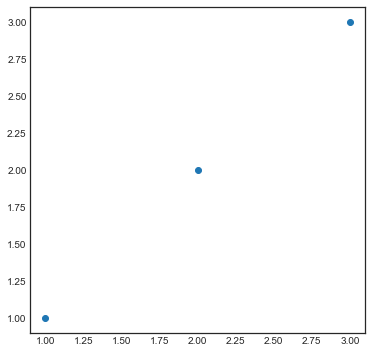

In [32]:
x_data = [1,2,3]
y_data = [1,2,3]
plt.figure(figsize=(6,6))
plt.scatter(x_data,y_data)
plt.show()